In [1]:
import numpy as np
import os
import segyio

from pyfrac.visualisation.plotting_support import explode_volume
from pyfrac.visualisation.traceviz import wiggleplot, traceimage

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
seispath = '/home/birniece/Documents/Projects/MicroseismicModelling/ShaheenTransfers/INCOMING/LargeRockBlock/outputs/su'


# PARAMETERS TO BE DEFINED

In [3]:
nr = 38*38*6


# SEISMOGRAMS

In [4]:
def read_seis(seisfile, nr):
    # s_wave_file = os.path.join(data_path,'test.bin.curl')
    seis_flat = np.loadtxt(seisfile)

    # determine number of timesamples and ensure it saved fully
    nt = int(seis_flat.shape[0] / nr)
    try:
        seis_flat.reshape((nr, nt))
    except:
        print('Not good dims \n nt:%i nr:%i \n vz flat:%i' % (nt, nr, seis_flat.shape[0]))

    # Resample to 2D
    seis = seis_flat[:nt * nr].reshape((nr, nt))
    return seis

In [5]:
# p = read_seis(os.path.join(seispath,'%s_div.txt'%expname), nr)
# vx = read_seis(os.path.join(seispath,'%s_vx.txt'%expname), nr)
vy = read_seis(os.path.join(seispath,'SourceArray_explosiveXfrac_p.txt'), nr)
# vz = read_seis(os.path.join(seispath,'%s_vz.txt'%expname), nr)

# nr=180
# seisfile = '/home/birniece/Documents/Projects/MicroseismicModelling/ShaheenTransfers/INCOMING/explosive_multishot/UtahFORGE_GriddedRecs/outputs/su/multishot_group00_vz.txt.shot1'
# vx = read_seis(seisfile, nr)


In [6]:
vy.shape

(8664, 60000)

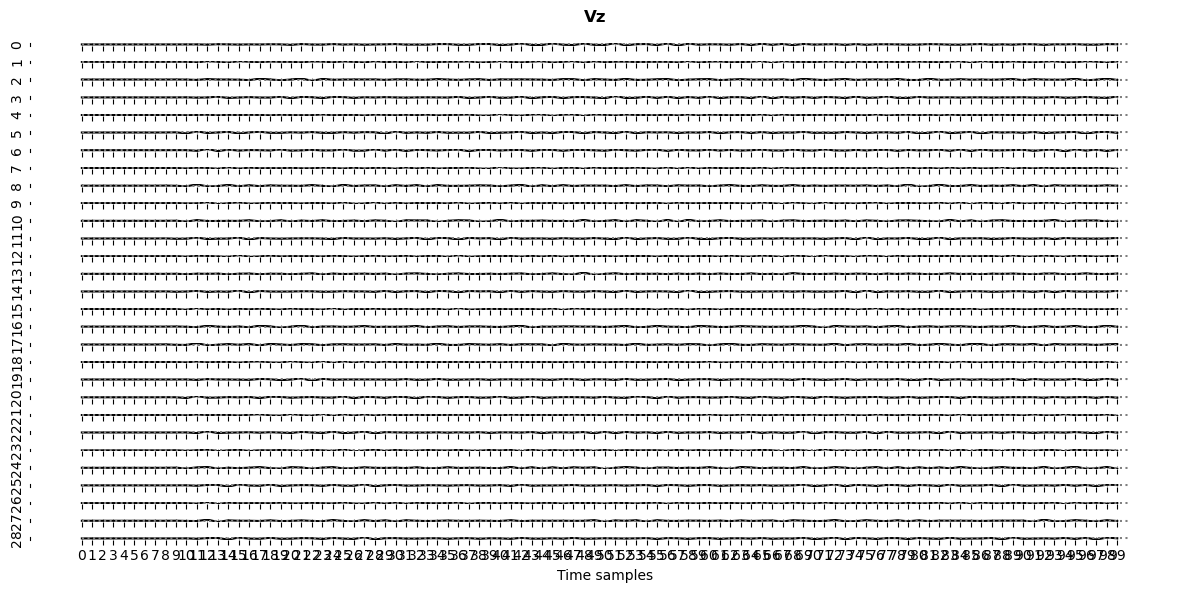

In [15]:
fig,axs = wiggleplot(vy[:38*38:50,0:100], norm_indiv=True);
fig.suptitle('Vz', fontweight='bold')
plt.tight_layout()

<Axes: title={'center': 'Seismic Recording'}, xlabel='Receiver #', ylabel='Time'>

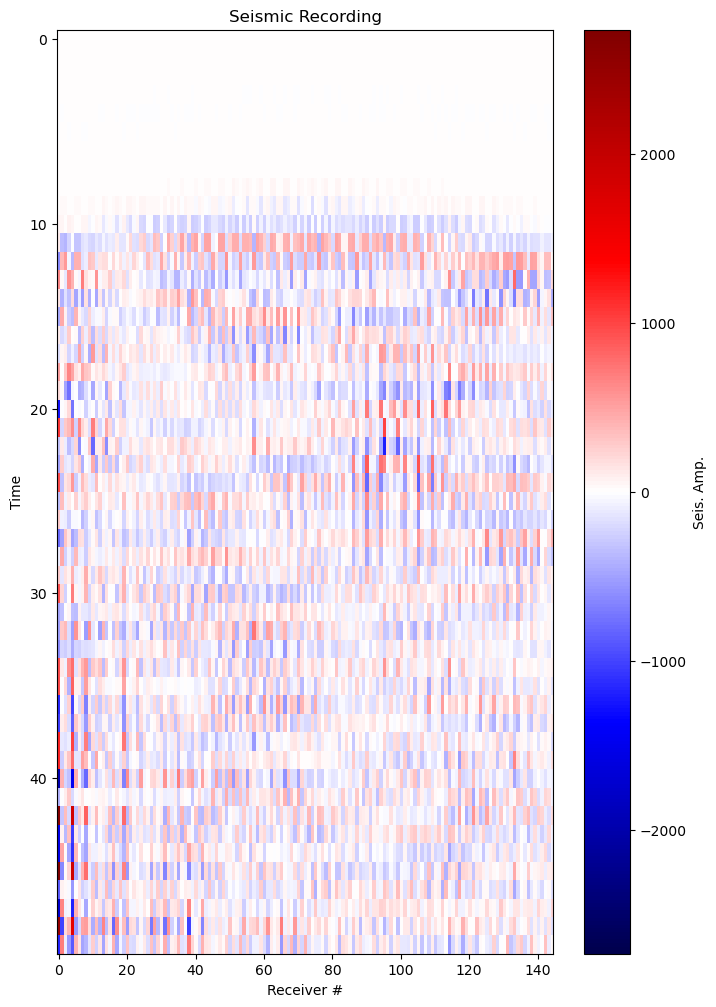

In [9]:
traceimage(vy[:38*38:10,0:50], climQ=100, figsize=[8,12])